In [1]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libdouble-conversion3 libegl-mesa0 libegl1 libevdev2
  libfluidsynth2 libgbm1 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmtdev1 libpcre2-16-0 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom2 libwayland-server0 libxcb-icccm4 libxcb-image0
  libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0
  libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme
  qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity qt5-image-formats-plugins qtwayland5 jackd
  musescore
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libdouble-conversion3 libegl-mesa0 libegl1
  libevdev2 libfluidsynth2 libgbm1 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch

In [2]:
!pip install --upgrade pyfluidsynth

  Preparing metadata (setup.py) ... done
  Created wheel for pyfluidsynth: filename=pyFluidSynth-1.3.3-py3-none-any.whl size=19185 sha256=3276e476d508304e67034cf77f5e4940e03a6fde39d5c703bb30471524910b5e
  Stored in directory: /root/.cache/pip/wheels/e6/9c/2b/b4b194cbb100d6f20136a22b2f76cd329b1a21139ed26c9775
Successfully built pyfluidsynth


In [3]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=da74f18a0286634ef656fdb1d95f08c8932fc1a6221549c62af7f22fc165cb78
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 require

In [4]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional


2024-05-21 15:11:15.383347: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 15:11:15.383467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 15:11:15.534066: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000


In [6]:
data_dir = pathlib.Path('data/maestro-v3.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v3.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )


58416533/58416533 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))


Number of files: 1276


In [9]:
sample_file = filenames[1]
print(sample_file)


data/maestro-v3.0.0/2013/ORIG-MIDI_03_7_6_13_Group__MID--AUDIO_09_R1_2013_wav--2.midi


In [10]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [11]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [12]:
display_audio(pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable


In [13]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [14]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')


0: pitch=75, note_name=D#5, duration=0.0677
1: pitch=63, note_name=D#4, duration=0.0781
2: pitch=75, note_name=D#5, duration=0.0443
3: pitch=63, note_name=D#4, duration=0.0469
4: pitch=75, note_name=D#5, duration=0.0417
5: pitch=63, note_name=D#4, duration=0.0469
6: pitch=87, note_name=D#6, duration=0.0443
7: pitch=99, note_name=D#7, duration=0.0690
8: pitch=87, note_name=D#6, duration=0.0378
9: pitch=99, note_name=D#7, duration=0.0742


In [126]:
def extract_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    notes['velocity'].append(note.velocity)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})


In [127]:
raw_notes = extract_notes(sample_file)
raw_notes.head()

pitch     start       end      step  duration  velocity
0     63  1.001302  1.079427  0.000000  0.078125        49
1     75  1.006510  1.074219  0.005208  0.067708        50
2     75  1.305990  1.350260  0.299479  0.044271        46
3     63  1.305990  1.352865  0.000000  0.046875        43
4     75  1.630208  1.671875  0.324219  0.041667        50

In [128]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['D#4', 'D#5', 'D#5', 'D#4', 'D#5', 'D#4', 'D#7', 'D#6', 'D#7',
       'D#6'], dtype='<U3')

In [129]:
def Plot_notes(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

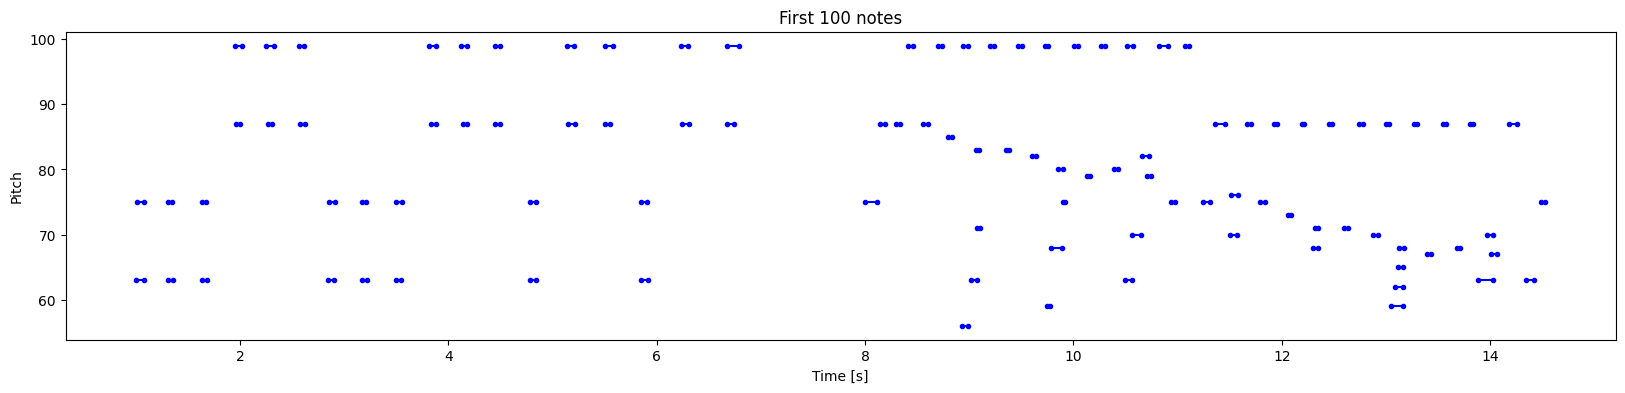

In [120]:
Plot_notes(raw_notes, count=100)

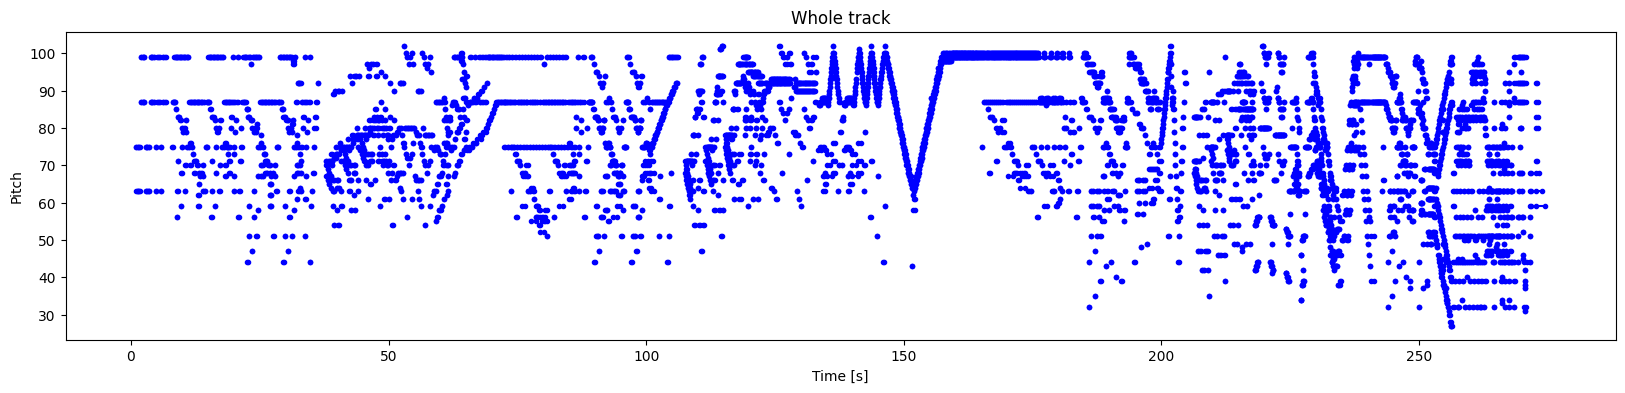

In [130]:
Plot_notes(raw_notes)

In [131]:
def plot_dist(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 4, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 4, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 4, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))
  # Velocity distribution
  plt.subplot(1, 4, 4)
  max_velocity = np.percentile(notes['velocity'], 100 - drop_percentile)
  sns.histplot(notes, x="velocity", bins=np.linspace(0, max_velocity, 21))
 


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

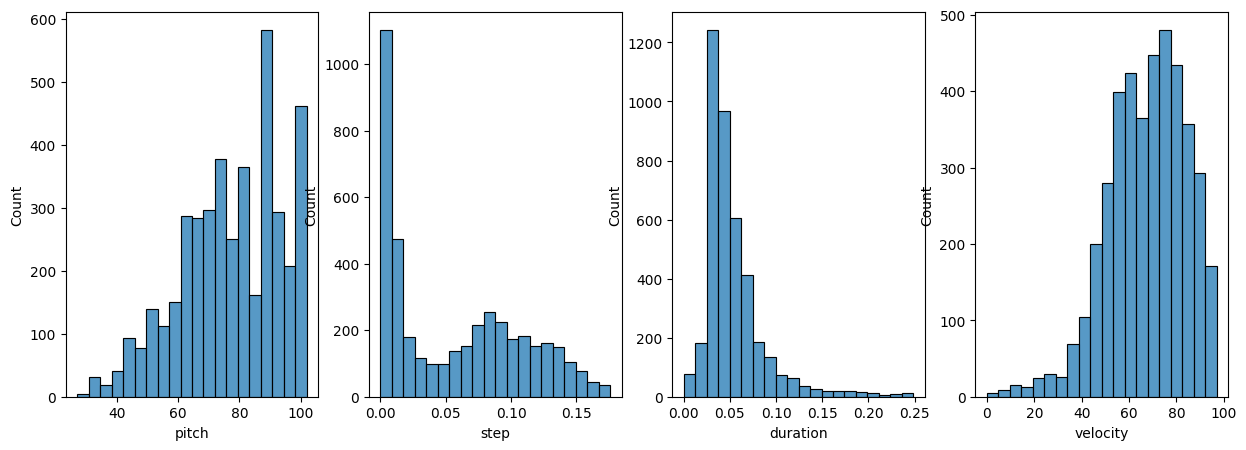

In [132]:
plot_dist(raw_notes)

In [133]:
def construct_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,   # default note loudness if not specified
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=int(note['velocity']),
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm


In [134]:
example_file = 'example.midi'
example_pm = construct_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)


In [24]:
display_audio(example_pm)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable


In [32]:
num_files = 20
all_notes = []
for f in filenames[:num_files]:
  notes = extract_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)


In [135]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)


Number of notes parsed: 102947


In [136]:
key_order = ['pitch', 'step', 'duration', 'velocity']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)


In [137]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(4,), dtype=tf.float64, name=None)

In [138]:
def create_seq(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0,127.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)


In [139]:
seq_length = 25
vocab_size = 128
seq_ds = create_seq(notes_ds, seq_length, vocab_size)
seq_ds.element_spec


(TensorSpec(shape=(25, 4), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'velocity': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [140]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)


sequence shape: (25, 4)
sequence elements (first 10): tf.Tensor(
[[0.5        0.         0.78125    0.51181102]
 [0.46875    0.00520833 0.77604167 0.42519685]
 [0.4296875  0.0078125  0.890625   0.37795276]
 [0.375      0.         0.98307292 0.37007874]
 [0.484375   0.78645833 0.06640625 0.48031496]
 [0.4609375  0.02473958 0.04557292 0.27559055]
 [0.46875    0.0625     0.05338542 0.47244094]
 [0.5        0.03645833 0.03255208 0.36220472]
 [0.484375   0.046875   0.05598958 0.4015748 ]
 [0.46875    0.0859375  0.14322917 0.42519685]], shape=(10, 4), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=43.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.029947916666666963>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.9127604166666661>, 'velocity': <tf.Tensor: shape=(), dtype=float64, numpy=39.0>}


In [141]:
batch_size = 128
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))


In [142]:
train_ds.element_spec

(TensorSpec(shape=(128, 25, 4), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'velocity': TensorSpec(shape=(128,), dtype=tf.float64, name=None)})

In [143]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)


In [102]:
input_shape = (seq_length, 4)
learning_rate = 0.001

inputs = tf.keras.Input(input_shape)

# Single Bidirectional LSTM layer with LeakyReLU activation
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(inputs)
x = tf.keras.layers.LeakyReLU(negative_slope=0.1)(x)
x = tf.keras.layers.Dropout(0.3)(x)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(x)
x = tf.keras.layers.LeakyReLU(negative_slope=0.1)(x)
x = tf.keras.layers.Dropout(0.3)(x)
# Self-attention mechanism
query_value_attention_seq = tf.keras.layers.Attention()([x, x])
x = tf.keras.layers.Concatenate()([x, query_value_attention_seq])

# Adding a BatchNormalization layer to stabilize and accelerate training
x = tf.keras.layers.BatchNormalization()(x)

# Flatten the output to feed into Dense layers
x = tf.keras.layers.Flatten()(x)

outputs = {
  'pitch': tf.keras.layers.Dense(128 , name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1,name='duration')(x),
  'velocity': tf.keras.layers.Dense(1, name='velocity')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
      'velocity': tf.keras.losses.MeanSquaredError(),
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 25, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_20    │ (None, 25, 256)   │    136,192 │ input_layer_11[0… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_20      │ (None, 25, 256)   │          0 │ bidirectional_20… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 25, 256)   │          0 │ leaky_re_lu_20[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_21    │ (None, 25, 256)   │    394,240 │ dropout_20[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_21      │ (None, 25, 256)   │          0 │ bidirectional_21… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 25, 256)   │          0 │ leaky_re_lu_21[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_11        │ (None, 25, 256)   │          0 │ dropout_21[0][0], │
│ (Attention)         │                   │            │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 25, 512)   │          0 │ dropout_21[0][0], │
│ (Concatenate)       │                   │            │ attention_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 25, 512)   │      2,048 │ concatenate_11[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 12800)     │          0 │ batch_normalizat… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ duration (Dense)    │ (None, 1)         │     12,801 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pitch (Dense)       │ (None, 128)       │  1,638,528 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step (Dense)        │ (None, 1)         │     12,801 │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ velocity (Dense)    │ (None, 1)         │     12,801 │ flatten_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,209,411 (8.43 MB)

 Trainable params: 2,208,387 (8.42 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [93]:
losses = model.evaluate(train_ds, return_dict=True)
losses


804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4888.2861


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


{'loss': 4875.47021484375}

In [103]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.01,
        'step': 0.01,
        'duration':0.05,
        'velocity': 0.01,
    },
    optimizer=optimizer,
)


In [101]:
model.evaluate(train_ds, return_dict=True)


804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 48.8449


{'loss': 48.716712951660156}

In [104]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]


In [105]:
%%time
epochs = 350

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)


Epoch 1/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 4.8254
Epoch 2/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.4140
Epoch 3/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.3662
Epoch 4/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 2.3332
Epoch 5/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.2980
Epoch 6/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.2687
Epoch 7/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.2641
Epoch 8/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.2373
Epoch 9/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 2.2196
Epoch 10/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 2.2097
Epoch 11/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 2.1970
Epoch 12/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 2.1895
Epoch 13/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 2.1811
Epoch 14/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 2.1694
Epoch 15/350
80

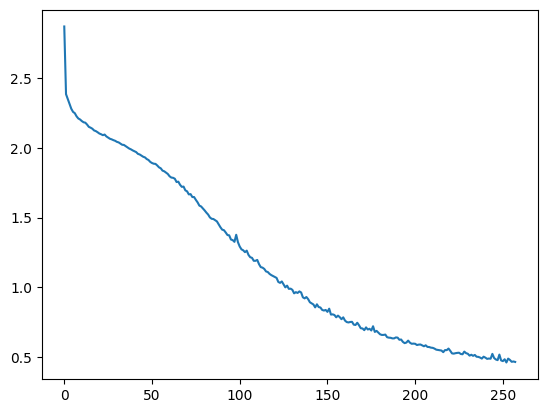

In [144]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [145]:
def Generate_note(
    notes: np.ndarray, 
    model: tf.keras.Model, 
    temperature: float = 1.0) -> tuple[int, float, float, int]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']
  velocity = predictions['velocity']
  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)
  velocity = tf.squeeze(velocity, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)
  velocity = tf.maximum(0, tf.minimum(127, velocity))
  return int(pitch), float(step), float(duration),int(velocity)


In [114]:
temperature = 1.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1,127.0]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration, velocity  = Generate_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration, velocity)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [146]:
generated_notes.head(10)

pitch      step  duration  velocity     start       end
0     75  0.166202  0.217627        44  0.166202  0.383829
1     65  0.244452  0.317929        93  0.410653  0.728582
2     94  0.188471  0.581707       103  0.599124  1.180831
3     61  0.180058  0.592041        99  0.779182  1.371223
4     94  0.192303  0.556347        95  0.971485  1.527832
5     95  0.193499  0.496879        98  1.164984  1.661863
6    102  0.198318  0.434167        88  1.363303  1.797469
7     95  0.268313  0.426178        92  1.631616  2.057794
8     94  0.345626  0.401720        86  1.977242  2.378962
9     85  0.321848  0.388887        79  2.299090  2.687977

In [116]:
out_file = 'output.mid'
out_pm = construct_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)


fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable


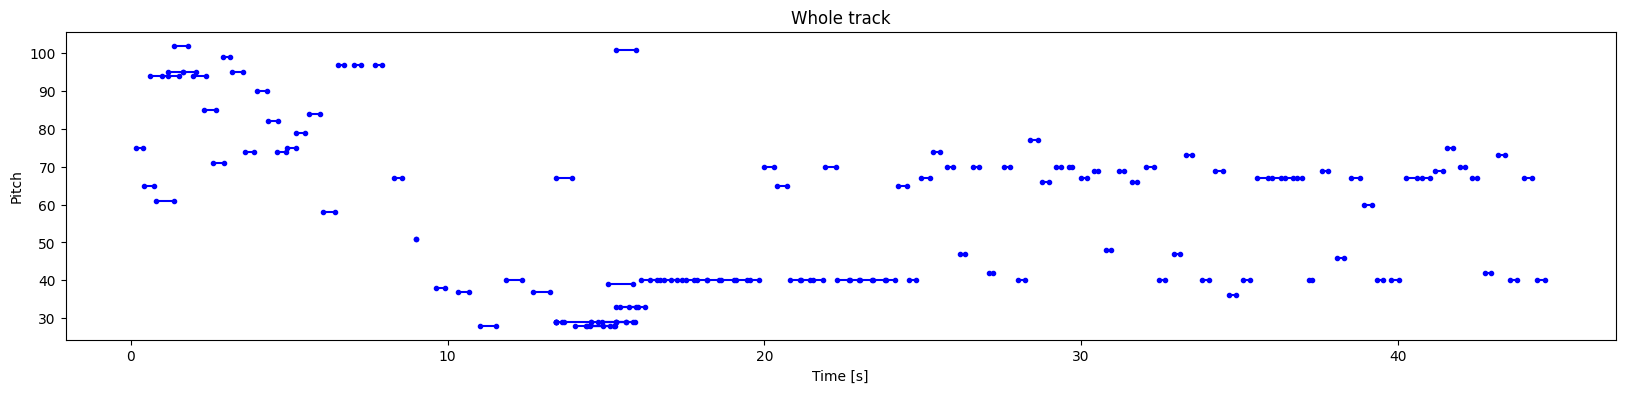

In [124]:
Plot_notes(generated_notes)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

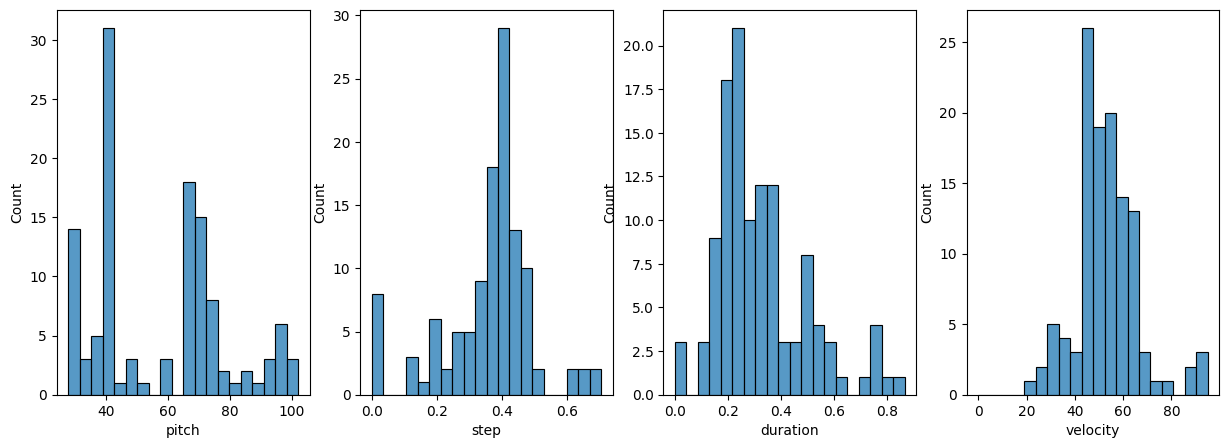

In [147]:
plot_dist(generated_notes)

In [148]:

model.save('nusic_gen.h5')


In [ ]:
# Load the model from the file for future use
model = tf.keras.models.load_model('my_music_generation_model.h5', custom_objects={'mse_with_positive_pressure': mse_with_positive_pressure})
